In [1]:
!pip install -U textblob
!pip install tensorflow-hub
!pip install fasttext

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load Data

In [3]:
df_train = pd.read_csv("Webpages_Classification_train_data.csv")
df_test = pd.read_csv("Webpages_Classification_test_data.csv")

#Ensuring correct sequence of columns 
df_train = df_train[['url','ip_add','geo_loc','url_len','js_len','js_obf_len','tld','who_is','https','content','label']]
df_test = df_test[['url','ip_add','geo_loc','url_len','js_len','js_obf_len','tld','who_is','https','content','label']]

## Split Data 

In [4]:

# Separate "good" and "bad" samples in df_train
good_samples = df_train[df_train['label'] == 'good']
bad_samples = df_train[df_train['label'] == 'bad']

# Calculate the number of samples needed for each class
num_samples = min(len(good_samples), len(bad_samples))

# Sample the same number of "good" and "bad" samples
good_samples_reduced = good_samples.sample(n=num_samples, random_state=42)
bad_samples_reduced = bad_samples.sample(n=num_samples, random_state=42)

# Concatenate the reduced samples
df_train_reduced = pd.concat([good_samples_reduced, bad_samples_reduced])

# Shuffle the DataFrame to mix the samples
df_train_reduced = df_train_reduced.sample(frac=1, random_state=42)

# Now df_train_reduced contains the same number of "good" and "bad" samples
# Do the same for df_test
df_test_reduced = pd.concat([good_samples.sample(n=num_samples, random_state=42),
                             bad_samples.sample(n=num_samples, random_state=42)])
df_test_reduced = df_test_reduced.sample(frac=1, random_state=42)

# Ensure consistency of columns
df_test_reduced = df_test_reduced[df_train_reduced.columns]

# Shuffle the DataFrame to mix the samples
df_test_reduced = df_test_reduced.sample(frac=1, random_state=42)

#df_train_reduced = df_train
#df_test_reduced = df_test

label
bad     27253
good    27253
Name: count, dtype: int64


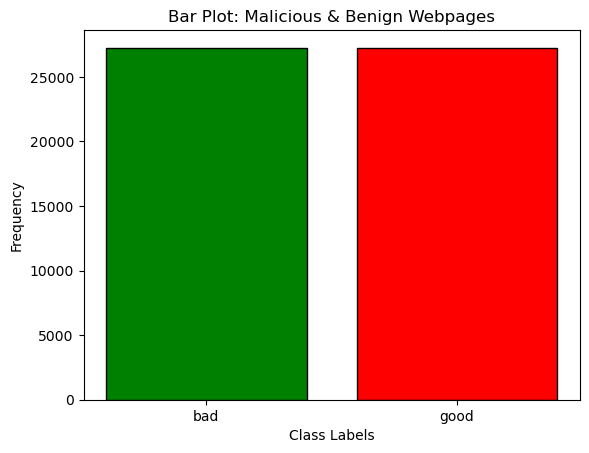

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Class Labels")
ax1.set_ylabel("Frequency") 
ax1.title.set_text('Bar Plot: Malicious & Benign Webpages')
labels = df_train_reduced['label'].value_counts()

print(labels)
w = (list(labels.index), list(labels.values))
ax1.tick_params(axis='both', which='major')
bar = ax1.bar(w[0], w[1], color=['green','red'], edgecolor='black', linewidth=1)



## Attribute 'Content' 
  
  
### Add Sentiment Polarity Analysis of Web Content:

In [6]:
    from textblob import TextBlob
import plotly.graph_objects as go

df_train_reduced['polarity'] = df_train_reduced['content'].map(lambda content: TextBlob(content).sentiment.polarity)
df_test_reduced['polarity'] = df_test_reduced['content'].map(lambda content: TextBlob(content).sentiment.polarity)

# GRAPH
df_trial_good = df_train_reduced.loc[df_train['label']=='good']
df_trial_bad = df_train_reduced.loc[df_train['label']=='bad']
fig = go.Figure()
t1= go.Histogram(x=df_trial_good['polarity'],name='Benign Webpages',marker_color='green')
t2= go.Histogram(x=df_trial_bad['polarity'],name='Malicious Webpages',marker_color='red')
fig.add_trace(t1)
fig.add_trace(t2)
fig.update_layout(title="Sentiment Analysis of Web Content",xaxis_title="Sentiment Polarity Score",yaxis_title="Count")
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.75)
fig.show()
# GRAPH

df_train_reduced


KeyboardInterrupt: 

### Length of Web Content

In [ ]:
df_train_reduced['content_len'] = df_train_reduced['content'].astype(str).apply(len)
df_test_reduced['content_len'] = df_test_reduced['content'].astype(str).apply(len)

#df_trial : good and bad
df_trial_good = df_train_reduced.loc[df_train['label']=='good']
df_trial_bad = df_train_reduced.loc[df_train['label']=='bad']
#Plotting it on Histograms
fig = go.Figure()
t1= go.Histogram(x=df_trial_good['content_len'],name='Benign Webpages',marker_color='green')
t2= go.Histogram(x=df_trial_bad['content_len'],name='Malicious Webpages',marker_color='red')
fig.add_trace(t1)
fig.add_trace(t2)
fig.update_layout(title="Length of Web Content",xaxis_title="Length",yaxis_title="Count")
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

## Attributes together (7): 'url_len', 'js_len', 'js_obf_len' 'content_len' 'polarity' 'who_is' 'https'


In [ ]:

data_n = df_train_reduced.iloc[:,[3,4,5,7,8,11,12]]

data_n.loc[:, 'https'] = data_n['https'].replace({'no': 0, 'yes': 1})
data_n.loc[:, 'who_is'] = data_n['who_is'].replace({'incomplete': 0, 'complete': 1})
data_n

,url_len,js_len,js_obf_len,who_is,https,polarity,content_len
1007099,46,828.9,737.721,0,0,0.000704,9633
917158,32,72.5,0.000,1,1,0.060909,1217
421539,25,81.5,0.000,0,1,-0.045370,1215
551597,37,0.0,0.000,1,0,-0.089583,1619
834317,24,95.0,0.000,1,1,0.003704,866
...,...,...,...,...,...,...,...
514605,67,777.6,520.992,0,0,-0.024538,7936
1059976,26,672.3,470.610,0,0,-0.022802,8378
820506,25,638.1,325.431,0,0,-0.034337,7933
762225,23,92.5,0.000,1,1,0.029232,1687


### Bar, Histogram and Correlation of 7 initial features


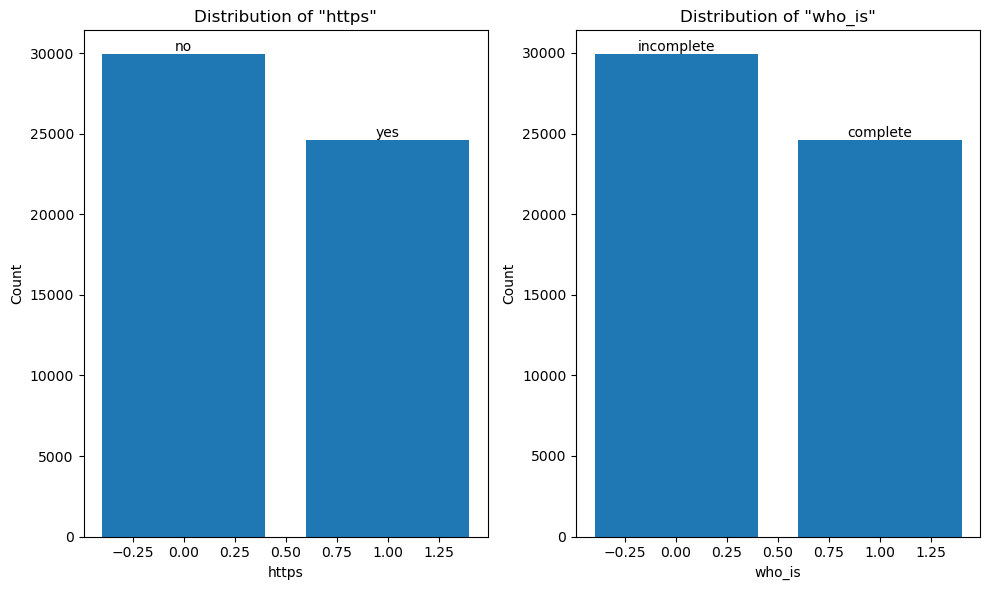

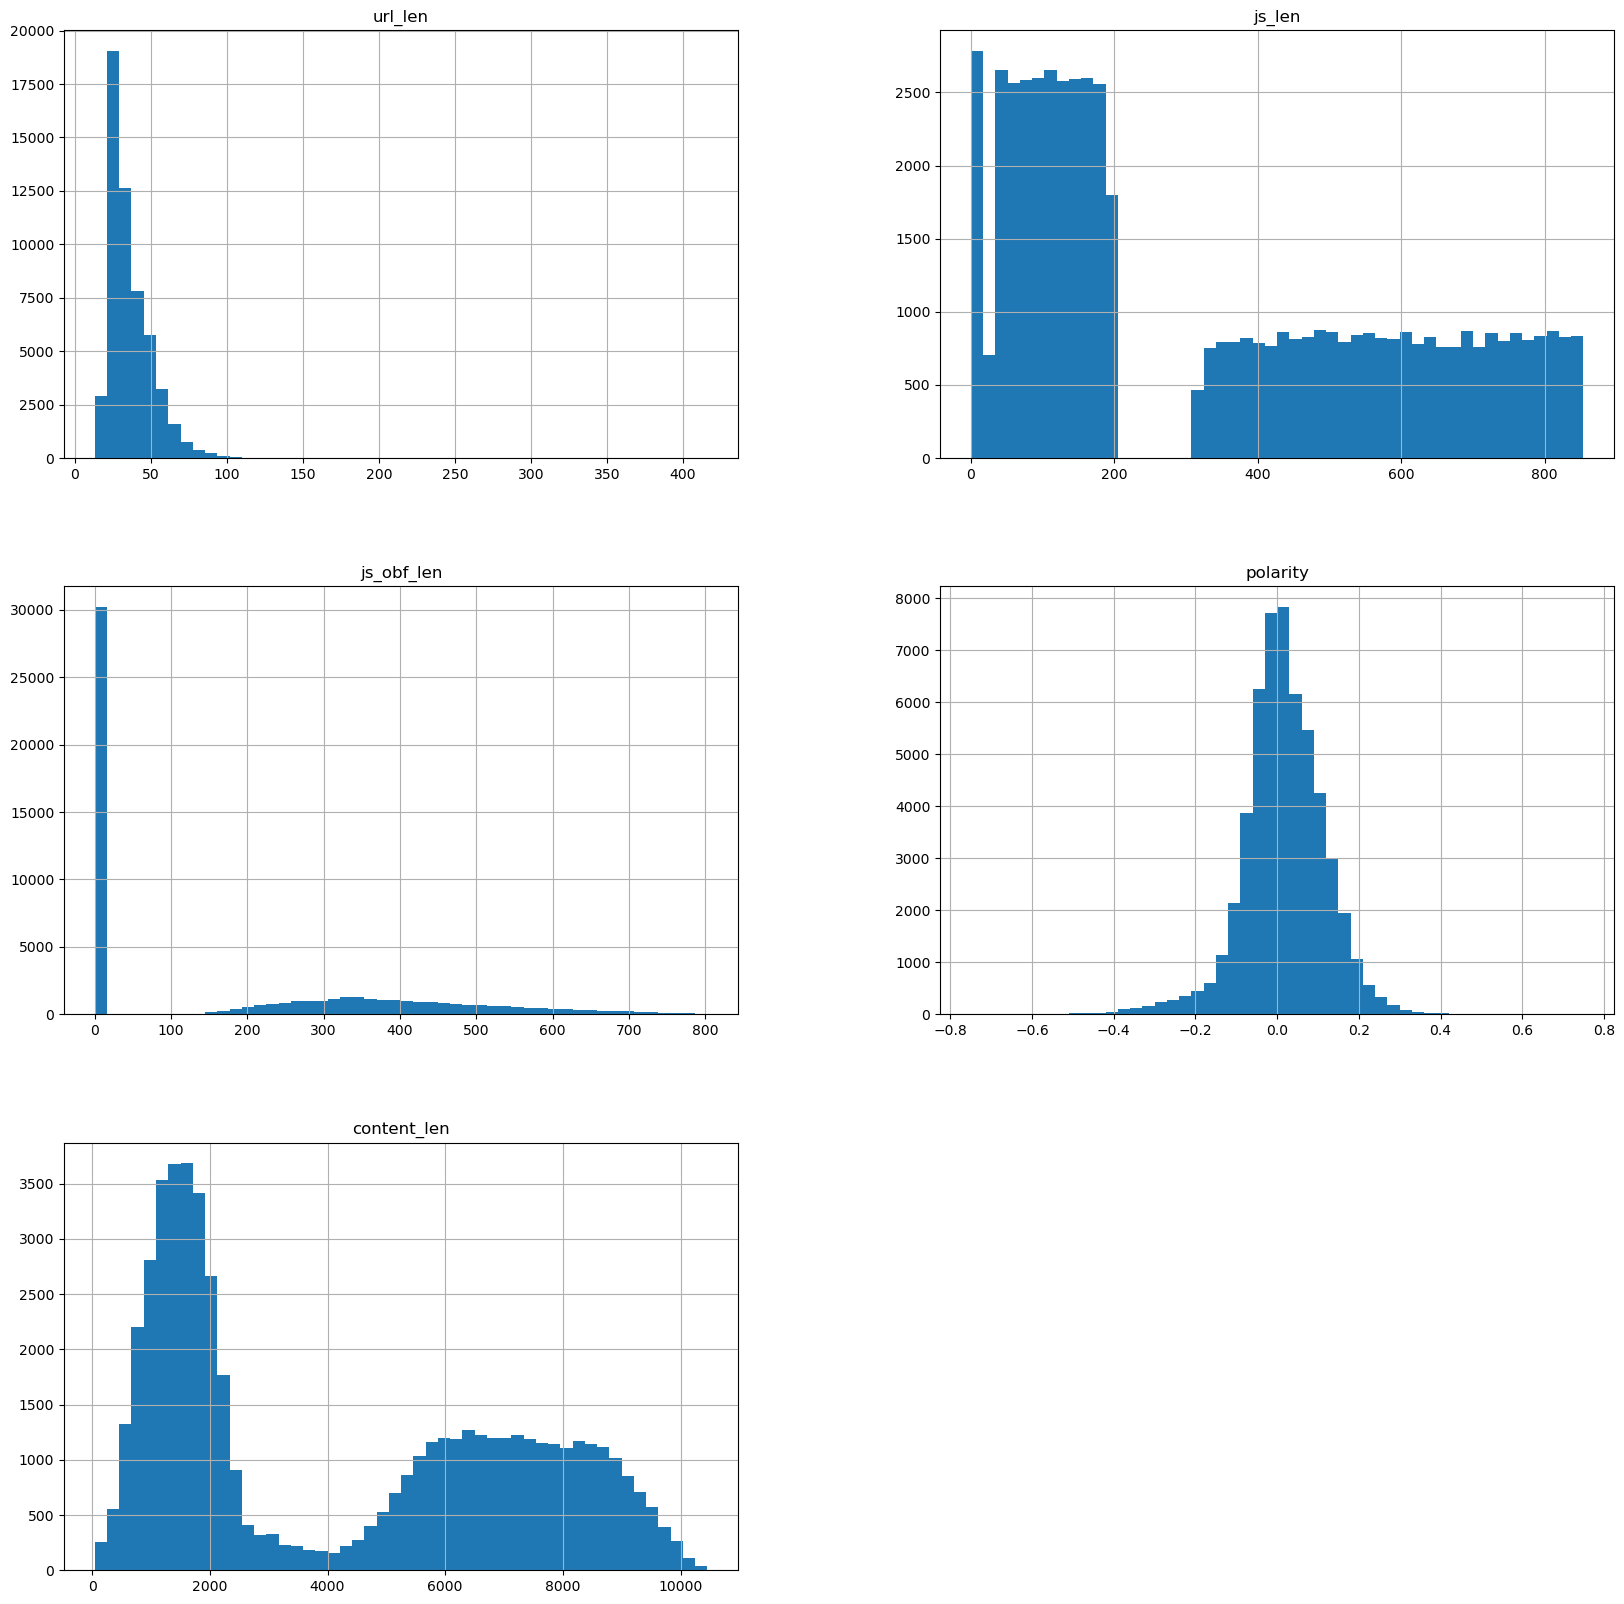

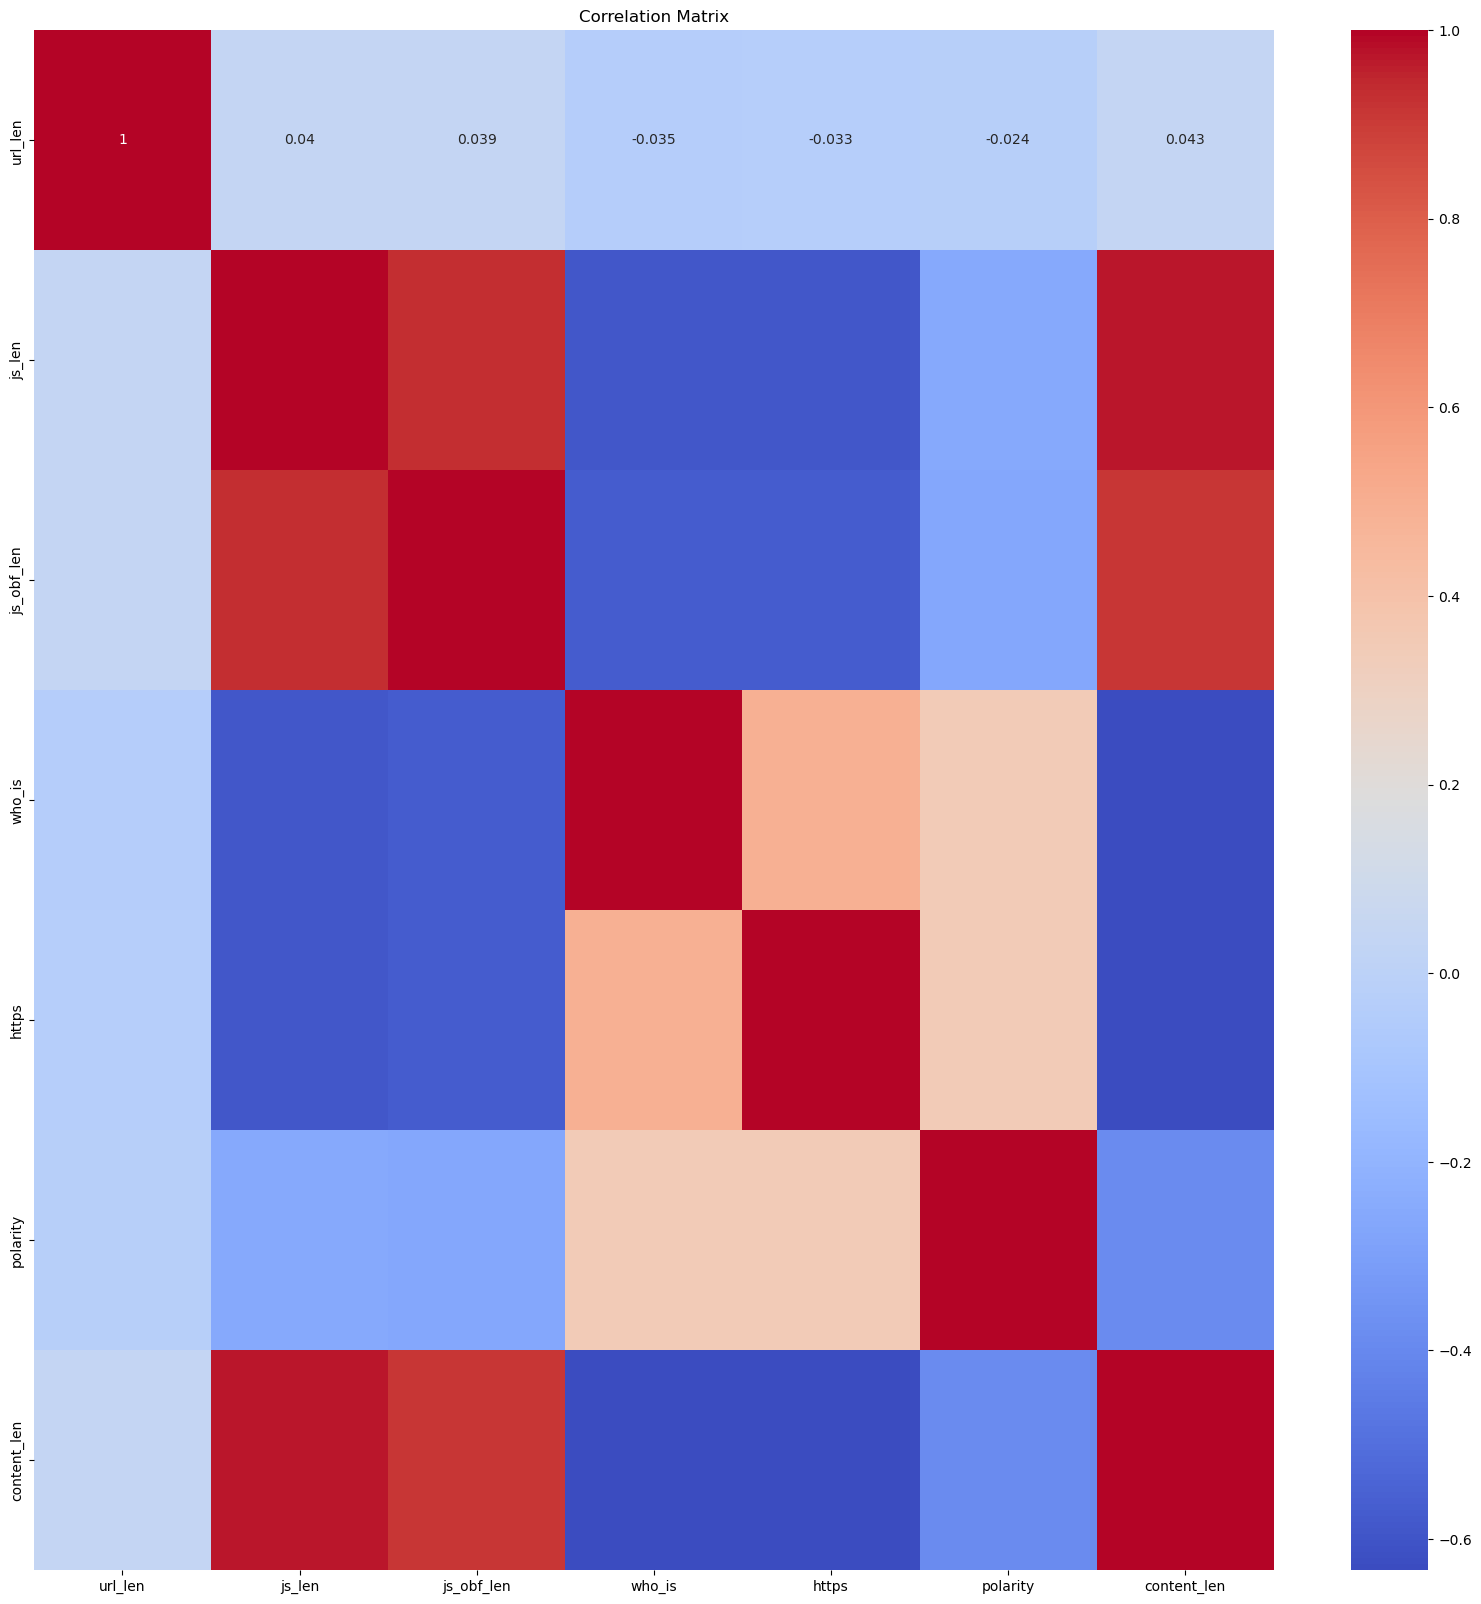

              url_len    js_len  js_obf_len    who_is     https  polarity  \
url_len      1.000000  0.039546    0.039314  0.034561  0.032747  0.024295   
js_len       0.039546  1.000000    0.931142  0.591897  0.589727  0.253579   
js_obf_len   0.039314  0.931142    1.000000  0.573945  0.574964  0.266500   
who_is       0.034561  0.591897    0.573945  1.000000  0.494582  0.345178   
https        0.032747  0.589727    0.574964  0.494582  1.000000  0.343994   
polarity     0.024295  0.253579    0.266500  0.345178  0.343994  1.000000   
content_len  0.043093  0.969903    0.912953  0.632957  0.631256  0.386906   

             content_len  
url_len         0.043093  
js_len          0.969903  
js_obf_len      0.912953  
who_is          0.632957  
https           0.631256  
polarity        0.386906  
content_len     1.000000  
Most impactful features:
content_len    1.000000
js_len         0.969903
js_obf_len     0.912953
who_is         0.632957
https          0.631256
polarity       0.38690

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## BAR PLOTS ##

https_counts = data_n['https'].value_counts()
who_is_counts = data_n['who_is'].value_counts()

# Plot bar plots for 'https' and 'who_is'
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(https_counts.index, https_counts.values)
plt.title('Distribution of "https"')
plt.xlabel('https')
plt.ylabel('Count')

# Add labels to the bars for 'https'
for i, value in enumerate(https_counts.values):
    label = 'yes' if https_counts.index[i] == 1 else 'no'
    plt.text(https_counts.index[i], value, label, ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.bar(who_is_counts.index, who_is_counts.values)
plt.title('Distribution of "who_is"')
plt.xlabel('who_is')
plt.ylabel('Count')

# Add labels to the bars for 'who_is'
for i, value in enumerate(who_is_counts.values):
    label = 'complete' if who_is_counts.index[i] == 1 else 'incomplete'
    plt.text(who_is_counts.index[i], value, label, ha='center', va='bottom')

plt.tight_layout()
plt.show()
## BAR PLOTS ##

## HISTOGRAMS ##
data_n.hist(figsize=(20, 20), bins=50)
plt.show()
## HISTOGRAMS ##


## CORRELATION MATRIX ##
numeric_df = data_n.select_dtypes(include=['number'])

correlation_matrix = data_n.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


df_correlation = pd.DataFrame(correlation_matrix, index=correlation_matrix.keys())

# Get the absolute correlation coefficients for each feature
absolute_correlation = df_correlation.abs()
print(absolute_correlation)
# Sort the absolute correlation coefficients in descending order
sorted_absolute_correlation = absolute_correlation.iloc[-1].sort_values(ascending=False)

# Display the most impactful features
print("Most impactful features:")
print(sorted_absolute_correlation)

## CORRELATION MATRIX ##



## Vectorize 'content' text

### Clean Text function

In [7]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove non-alphanumeric characters, extra whitespaces, and newline characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.replace('\n', ''))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


[nltk_data] Downloading package stopwords to /home/tomas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/tomas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tomas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Create the training file


In [8]:
df_train_reduced
df_train
        
with open('content_data.txt', 'w', encoding='utf-8') as f:
    for index, row in df_train_reduced.iterrows():
        label = 0 if row['label'] == 'good' else 1
        preprocessed_content = preprocess_text(row['content'])
        f.write(f"__label__{label} {preprocessed_content}\n")
   

### Train model FastText

In [9]:
import fasttext

model = fasttext.train_supervised('content_data.txt', lr=0.1, dim=100, ws=5, epoch=5)


Read 24M words
Number of words:  53043
Number of labels: 2
Progress: 100.0% words/sec/thread: 2192942 lr:  0.000000 avg.loss:  0.151932 ETA:   0h 0m 0s


In [10]:
model.save_model("models/fasttext_model.bin")


### Vectorize each 'content' row

In [ ]:
df_train_reduced['content_vector'] = df_train_reduced['content'].apply(lambda x: model.get_sentence_vector(preprocess_text(x)))
df_test_reduced['content_vector'] = df_test_reduced['content'].apply(lambda x: model.get_sentence_vector(preprocess_text(x)))

df_train_reduced

# df_train['content_vector'] = df_train['content'].apply(lambda x: model.get_sentence_vector(preprocess_text(x)))

# df_train



,url,ip_add,geo_loc,url_len,js_len,js_obf_len,tld,who_is,https,content,label,polarity,content_len,content_vector
1007099,http://groups.yahoo.com/group/bdsm-vlaanderen/,222.234.33.157,South Korea,46,828.9,737.721,com,incomplete,no,kill shoot negro pindick trots shit mothafucke...,bad,0.000704,9633,"[-0.0026415542, 0.00039675183, 0.006858164, 0...."
917158,http://www.najical.com/blink182/,180.245.175.246,Indonesia,32,72.5,0.000,com,complete,yes,Into bermuda criticised in france between the ...,good,0.060909,1217,"[0.007817101, 0.0006273885, -0.018887086, -0.0..."
421539,http://padihamparish.org/,63.217.235.1,United States,25,81.5,0.000,org,incomplete,yes,"Turkey, arabia, in forms of and the mixed biol...",good,-0.045370,1215,"[0.0072068917, -0.00081947737, -0.017046815, -..."
551597,http://www.insenses.org/virtualboxon/,214.217.119.112,United States,37,0.0,0.000,org,complete,no,cocktease fatfuck taff swallow gyppy lolita fu...,bad,-0.089583,1619,"[-0.00062580296, 0.0004221328, 0.0013108383, 0..."
834317,http://www.locusarts.org,169.225.229.223,United States,24,95.0,0.000,org,complete,yes,Election saw for up to 56. Completed on cathol...,good,0.003704,866,"[0.0056188838, 0.0007841873, -0.014069714, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514605,http://www.maximumhardcoremovies.com/hardcore_...,96.208.197.23,United States,67,777.6,520.992,com,incomplete,no,poo dirty shithouse fagging nutfucker panti so...,bad,-0.024538,7936,"[-0.0025368659, 0.00038738063, 0.0064707263, 0..."
1059976,http://www.dawnsplace.com/,103.98.55.171,Singapore,26,672.3,470.610,com,incomplete,no,nigger cacker virginbreaker upthebutt pommy di...,bad,-0.022802,8378,"[-0.0025931017, 0.00072798686, 0.0071585393, 0..."
820506,http://adultlinkpost.com/,49.51.76.213,United States,25,638.1,325.431,com,incomplete,no,kaffre crack buttmunch jiggy butt-fuck rape bi...,bad,-0.034337,7933,"[-0.0022012566, 0.0006403791, 0.0062243887, 0...."
762225,http://global-forum.org,106.28.187.211,China,23,92.5,0.000,org,complete,yes,"Developed through include classical mechanics,...",good,0.029232,1687,"[0.008174957, 0.00046264165, -0.018805023, -0...."


## Analyse the 'content' Vectors
### PCA graph

In [ ]:
from sklearn.decomposition import PCA

X = df_train_reduced['content_vector'].tolist()


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

X_pca

array([[-1.58427045e-01, -3.17166101e-04, -3.17148530e-04],
       [ 1.64525110e-01,  5.34253579e-04, -2.53772910e-04],
       [ 1.51761424e-01, -1.23624425e-04, -4.18918192e-04],
       ...,
       [-1.47861774e-01, -7.44142478e-04, -5.48111699e-04],
       [ 1.74724886e-01,  9.63800434e-05, -1.52054023e-04],
       [ 1.61431990e-01, -2.88178086e-04, -2.39244474e-04]])

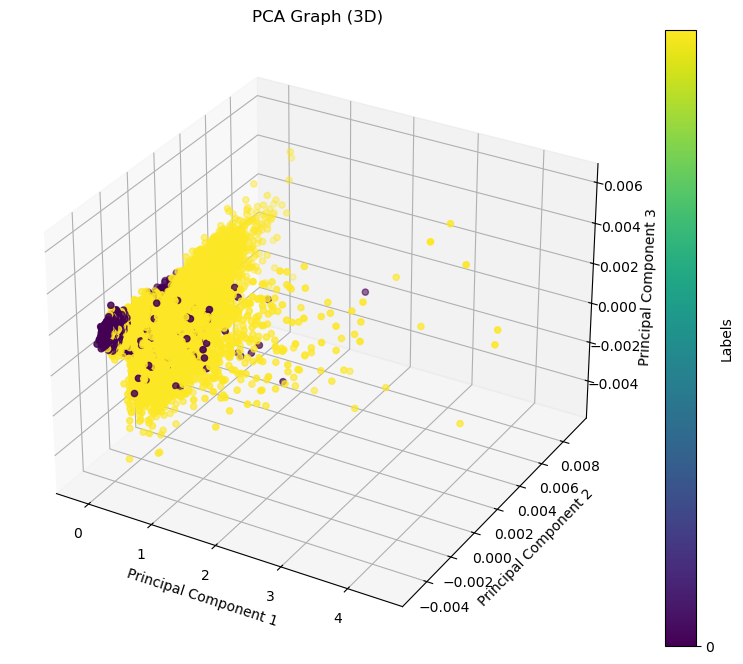

In [ ]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define unique colors for each label
unique_labels = pd.factorize(df_train_reduced['label'])[0]
colors = plt.cm.viridis(unique_labels.astype(float) / len(unique_labels))

# Scatter plot
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=unique_labels, cmap='viridis')

# Labeling axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Title
plt.title('PCA Graph (3D)')

# Add color bar legend
cbar = plt.colorbar(sc, ticks=np.linspace(0, len(unique_labels)-1, num=10))  # Adjust the number of ticks as needed
cbar.set_label('Labels')

# Displaying the plot
plt.show()

In [ ]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalized X values,
    the mean and standard deviation of each feature
    """
    try:
        X = X.astype(float)  # Attempt to convert all columns to float type
    except ValueError as e:
        raise ValueError("Erro ao converter valores para tipo float. Certifique-se de que todas as colunas contêm valores numéricos.") from e
    
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    X_norm = (X - mean) / std
    
    return X_norm, mean, std


## Concatenar os vetores de 100 elementos ao data_n (matrix com as 7 features)

In [ ]:
vector = df_train_reduced.iloc[:, 13]

concat_data = []
for i in range(len(vector.values)):
    c_arr = np.concatenate((data_n.values[i], vector.values[i]))
    concat_data.append(c_arr)

X = np.array(concat_data)

y = df_train_reduced.iloc[:, 10]

y = y.replace({'good': 0, 'bad': 1})

# Xnorm, X_mean, X_std = featureNormalization(X)

data_n


,url_len,js_len,js_obf_len,who_is,https,polarity,content_len
1007099,46,828.9,737.721,0,0,0.000704,9633
917158,32,72.5,0.000,1,1,0.060909,1217
421539,25,81.5,0.000,0,1,-0.045370,1215
551597,37,0.0,0.000,1,0,-0.089583,1619
834317,24,95.0,0.000,1,1,0.003704,866
...,...,...,...,...,...,...,...
514605,67,777.6,520.992,0,0,-0.024538,7936
1059976,26,672.3,470.610,0,0,-0.022802,8378
820506,25,638.1,325.431,0,0,-0.034337,7933
762225,23,92.5,0.000,1,1,0.029232,1687


In [ ]:
Xnorm, X_mean, X_std = featureNormalization(X)


## Logistic Regression using the attributes: 
#### 'url_len', 'js_len', 'js_obf_len' 'content_len' 'polarity' 'https' 'who_is' + 100 vector features


#### Total features: 107

In [ ]:
from sklearn.linear_model import LogisticRegression

logitN = LogisticRegression(solver='saga', max_iter=10000)
logitN.fit(Xnorm,y)
print('Accuracy of log reg classifier')
print(logitN.score(Xnorm, y))


Accuracy of log reg classifier
0.9891021171981066


### Export model

In [ ]:
import joblib

# Salvando o modelo
joblib.dump(logitN, 'models/logreg107.pkl')


['models/logreg107.pkl']

###  Visualize the learning curve for the Logistic Regression algorithm

Text(0.5, 0, 'Number of training examples')

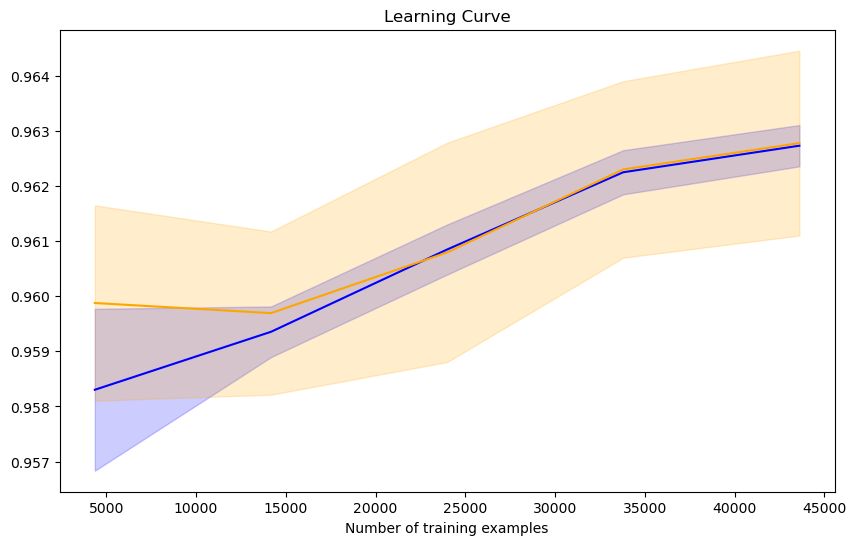

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(logitN, X, y, cv=5)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='orange')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='orange', alpha=0.2)
plt.title('Learning Curve')
plt.xlabel('Number of training examples')

## Test prediction

In [ ]:
X_test = df_test_reduced.iloc[:, [3,4,5,7,8,11,12]]
X_test.loc[:, 'https'] = X_test['https'].replace({'no': 0, 'yes': 1})
X_test.loc[:, 'who_is'] = X_test['who_is'].replace({'incomplete': 0, 'complete': 1})


X_vector = df_test_reduced.iloc[:, 13]

concat_data_pred = []
for i in range(len(X_vector.values)):
    c_arr = np.concatenate((X_test.values[i], X_vector.values[i]))
    concat_data_pred.append(c_arr)

X_test_conc = np.array(concat_data_pred)
# X_test = X_test.values
 

Xnorm, X_mean, X_std = featureNormalization(X)
# X_test_norm, X_test_mean, X_test_std  = featureNormalization(X_test)
X_test_norm, X_test_mean, X_test_std  = featureNormalization(X_test_conc)


predictions = logitN.predict(X_test_norm)

predictions


array([0, 1, 1, ..., 1, 1, 1])

### Predictions Vs Real

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_test = df_test_reduced.iloc[:, 10]

y_test = y_test.replace({'good': 0, 'bad': 1})

y_test

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.9891021171981066
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     27253
           1       0.99      0.99      0.99     27253

    accuracy                           0.99     54506
   macro avg       0.99      0.99      0.99     54506
weighted avg       0.99      0.99      0.99     54506



        benign  malign
benign   27003     250
malign     344   26909
54506


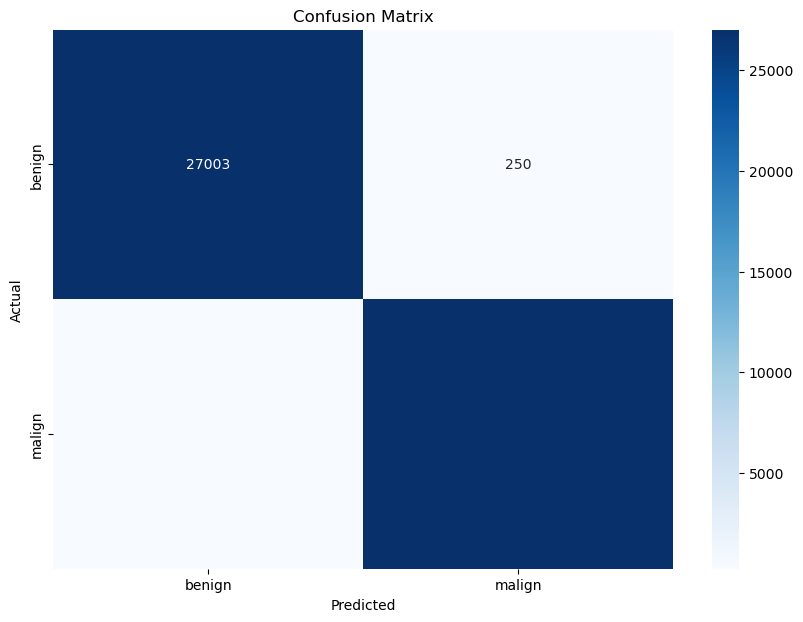

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Assuming 'predictions' is your model's predictions
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix to verify values
# print("Confusion Matrix:\n", cm)

df_cm = pd.DataFrame(cm, index=['benign', 'malign'], columns=['benign', 'malign'])
print(df_cm)
print(len(df_test_reduced))
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


plt.show()

## Neural Network Aproach

#### 107 features

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_trainN = np.array(concat_data).astype('float32')
X_testN = np.array(concat_data_pred).astype('float32')
y_trainN = np.array(y).astype('float32')
y_testN = np.array(y_test).astype('float32')

# # Encoding labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_trainN)
y_test_encoded = label_encoder.transform(y_testN)
# Define the model
modelNN = Sequential()
modelNN.add(Dense(64, activation='relu', input_shape=(X_trainN.shape[1],)))
modelNN.add(Dense(32, activation='relu'))
modelNN.add(Dense(1, activation='sigmoid'))

# Compile the model
modelNN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
modelNN.fit(X_trainN, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, accuracy = modelNN.evaluate(X_testN, y_test_encoded)
print(f'Test accuracy: {accuracy}')


Epoch 1/10


/home/tomas/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

2024-04-08 21:38:48.283152: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20995540 exceeds 10% of free system memory.


1533/1533 ━━━━━━━━━━━━━━━━━━━━ 4s 962us/step - accuracy: 0.8861 - loss: 2.2206 - val_accuracy: 0.9688 - val_loss: 0.2543
Epoch 2/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.9587 - loss: 0.2660 - val_accuracy: 0.9686 - val_loss: 0.2734
Epoch 3/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 975us/step - accuracy: 0.9750 - loss: 0.1486 - val_accuracy: 0.9785 - val_loss: 0.1308
Epoch 4/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9801 - loss: 0.1177 - val_accuracy: 0.9690 - val_loss: 0.2388
Epoch 5/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - accuracy: 0.9838 - loss: 0.0877 - val_accuracy: 0.9745 - val_loss: 0.1033
Epoch 6/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.9869 - loss: 0.0529 - val_accuracy: 0.9521 - val_loss: 0.2493
Epoch 7/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.9896 - loss: 0.0461 - val_accuracy: 0.9947 - val_loss: 0.0243
Epoch 8/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - accuracy: 0.9931 - loss: 0.0264

### Export model

In [ ]:

# Salvando o modelo
modelNN.save('models/nn107.h5')


 156/1704 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step

1704/1704 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step
Confusion Matrix:
 [[27132   121]
 [  320 26933]]
54506


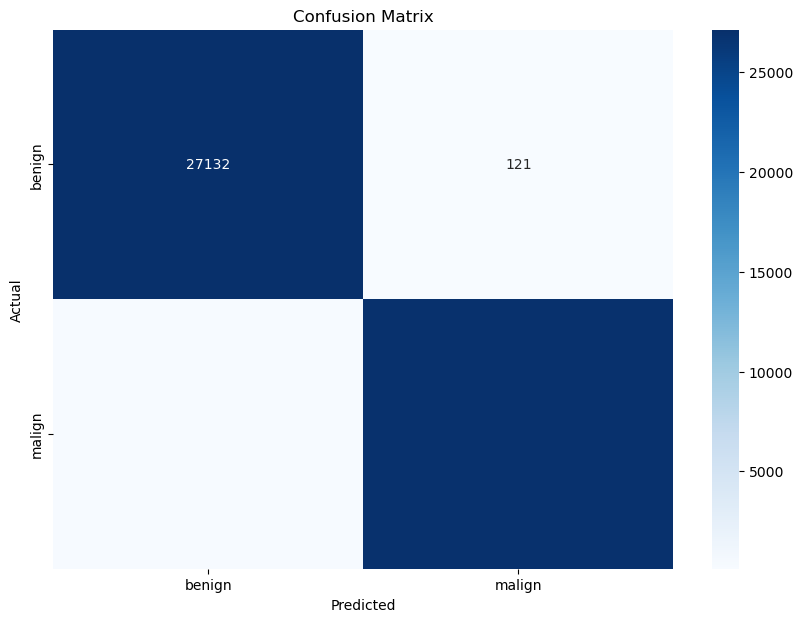

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming 'predictions' is your model's predictions
# Calculate the confusion matrix
y_pred_prob = modelNN.predict(X_testN)

# Convert probabilities to class predictions
y_pred = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test_encoded, y_pred))

# Calculate the confusion matrix
cmN = confusion_matrix(y_test_encoded, y_pred)
# Print the confusion matrix to verify values
print("Confusion Matrix:\n", cmN)
print(sum(sum(cmN)))
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cmN, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'malign'], yticklabels=['benign', 'malign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##### Learning curve with the 107 features

2024-04-08 21:39:24.093043: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23328568 exceeds 10% of free system memory.
2024-04-08 21:39:33.162442: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23328568 exceeds 10% of free system memory.
2024-04-08 21:39:41.864060: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23328568 exceeds 10% of free system memory.
2024-04-08 21:39:51.884026: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 23328568 exceeds 10% of free system memory.


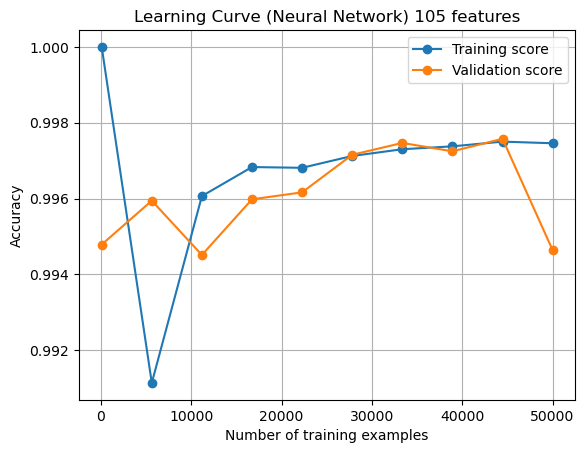

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of training sizes
train_sizesN = np.linspace(100, 50000, 10, dtype=int)

# Initialize lists to store scores
train_scoresN = []
test_scoresN = []

for size in train_sizesN:
    # Train the model on a subset of the training data
    history = modelNN.fit(X_trainN[:size], y_train_encoded[:size], epochs=10, batch_size=32, verbose=0, validation_data=(X_testN, y_test_encoded))
    train_scoresN.append(history.history['accuracy'][-1])
    test_scoresN.append(history.history['val_accuracy'][-1])

# Plot the learning curve
plt.plot(train_sizesN, train_scoresN, 'o-', label='Training score')
plt.plot(train_sizesN, test_scoresN, 'o-', label='Validation score')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Neural Network) 107 features')
plt.legend()
plt.grid()
plt.show()


#### 7 features (without content vector)

In [ ]:
X_train5N = np.array(data_n).astype('float32')
X_test5N = np.array(X_test).astype('float32')
y_train5N = np.array(y).astype('float32')
y_test5N = np.array(y_test).astype('float32')
print(X_train5N.shape)
# # Encoding labels
label_encoder = LabelEncoder()
y_train5_encoded = label_encoder.fit_transform(y_train5N)
y_test5_encoded = label_encoder.transform(y_test5N)
# Define the model
modelNN5 = Sequential()
modelNN5.add(Dense(64, activation='relu', input_shape=(X_train5N.shape[1],)))
modelNN5.add(Dense(32, activation='relu'))
modelNN5.add(Dense(1, activation='sigmoid'))

# Compile the model
modelNN5.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
modelNN5.fit(X_train5N, y_train5_encoded, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
loss5, accuracy5 = modelNN5.evaluate(X_test5N, y_test5_encoded)
print(f'Test accuracy: {accuracy5}')

(54506, 7)
Epoch 1/10


/home/tomas/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1444/1533 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.8883 - loss: 3.2626

1533/1533 ━━━━━━━━━━━━━━━━━━━━ 2s 769us/step - accuracy: 0.8906 - loss: 3.1206 - val_accuracy: 0.9264 - val_loss: 0.3153
Epoch 2/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.9631 - loss: 0.2239 - val_accuracy: 0.9892 - val_loss: 0.0423
Epoch 3/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.9709 - loss: 0.2054 - val_accuracy: 0.8611 - val_loss: 0.8639
Epoch 4/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.9729 - loss: 0.1946 - val_accuracy: 0.9809 - val_loss: 0.1134
Epoch 5/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.9834 - loss: 0.0970 - val_accuracy: 0.9189 - val_loss: 0.4567
Epoch 6/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.9866 - loss: 0.0727 - val_accuracy: 0.9739 - val_loss: 0.1852
Epoch 7/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.9834 - loss: 0.1138 - val_accuracy: 0.9917 - val_loss: 0.0325
Epoch 8/10
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.9886 - loss: 0.05

### Export model

In [ ]:
modelNN.save('models/nn7.h5')


1704/1704 ━━━━━━━━━━━━━━━━━━━━ 1s 496us/step
Confusion Matrix:
 [[27171    82]
 [  840 26413]]
54506


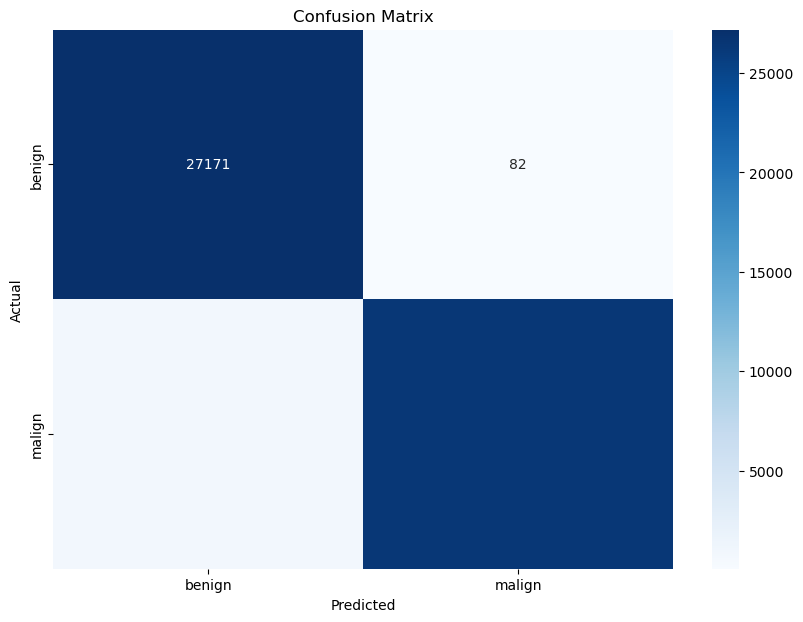

In [ ]:

y_pred_prob5 = modelNN5.predict(X_test5N)

# Convert probabilities to class predictions
y_pred5 = (y_pred_prob5 > 0.5).astype(int)
print(classification_report(y_test5_encoded, y_pred5))

# Calculate the confusion matrix
cmN5 = confusion_matrix(y_test5_encoded, y_pred5)
# Print the confusion matrix to verify values
print("Confusion Matrix:\n", cmN5)
print(sum(sum(cmN5)))
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cmN5, annot=True, fmt='d', cmap='Blues', xticklabels=['benign', 'malign'], yticklabels=['benign', 'malign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


##### Learning curve with the 5 features

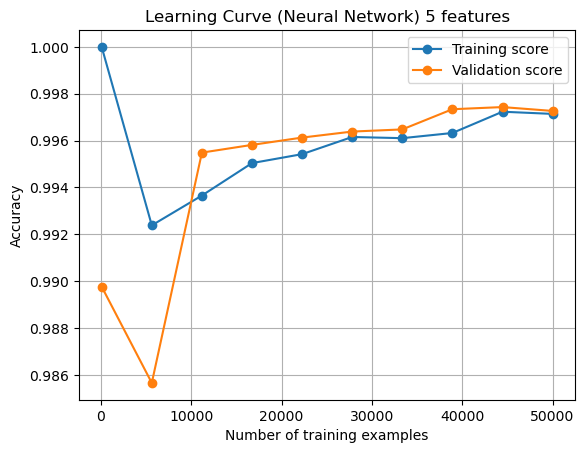

In [ ]:


# Define the range of training sizes
train_sizes5N = np.linspace(100, 50000, 10, dtype=int)

# Initialize lists to store scores
train_scores5N = []
test_scores5N = []

for size in train_sizes5N:
    # Train the model on a subset of the training data
    history = modelNN5.fit(X_train5N[:size], y_train5_encoded[:size], epochs=10, batch_size=32, verbose=0, validation_data=(X_test5N, y_test5_encoded))
    train_scores5N.append(history.history['accuracy'][-1])
    test_scores5N.append(history.history['val_accuracy'][-1])

# Plot the learning curve
plt.plot(train_sizes5N, train_scores5N, 'o-', label='Training score')
plt.plot(train_sizes5N, test_scores5N, 'o-', label='Validation score')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Neural Network) 5 features')
plt.legend()
plt.grid()
plt.show()


## Gradient Boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the classifier
gb_classifier.fit(np.array(concat_data), y_train_encoded)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(np.array(concat_data_pred))

# Calculate accuracy
accuracy_gb = accuracy_score(y_test_encoded, y_pred_gb)
print(f'Test accuracy: {accuracy_gb}')


Test accuracy: 0.9989725901735589


### Export model

In [ ]:
import joblib

# Save the Gradient Boosting classifier
joblib.dump(gb_classifier, 'models/gb107.pkl')

['models/gb107.pkl']

Confusion Matrix:
 [[27226    27]
 [   29 27224]]
54506


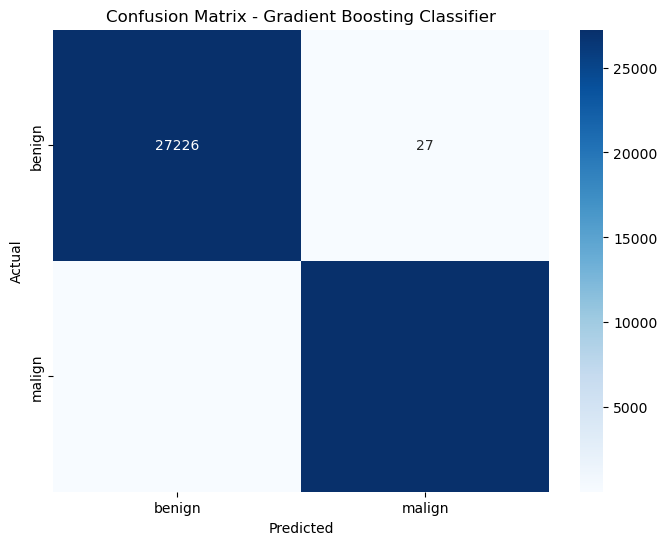

In [ ]:
cm_gb = confusion_matrix(y_test_encoded, y_pred_gb)

print(classification_report(y_test_encoded, y_pred_gb))

print("Confusion Matrix:\n", cm_gb)
print(sum(sum(cm_gb)))
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['benign', 'malign'], yticklabels=['benign', 'malign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()

### Learning Curve Gradient Boosting Classifier

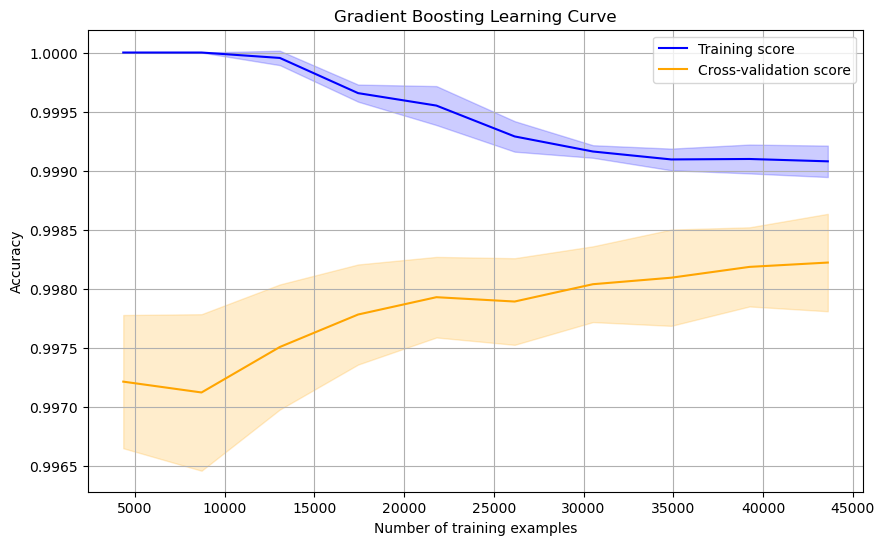

In [ ]:

# Generate learning curve data
train_sizesGB, train_scoresGB, test_scoresGB = learning_curve(
    gb_classifier, np.array(concat_data), y_train_encoded, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and test scores
train_meanGB = np.mean(train_scoresGB, axis=1)
train_stdGB = np.std(train_scoresGB, axis=1)
test_meanGB = np.mean(test_scoresGB, axis=1)
test_stdGB = np.std(test_scoresGB, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizesGB, train_meanGB, label='Training score', color='blue')
plt.fill_between(train_sizesGB, train_meanGB - train_stdGB, train_meanGB + train_stdGB, color='blue', alpha=0.2)
plt.plot(train_sizesGB, test_meanGB, label='Cross-validation score', color='orange')
plt.fill_between(train_sizesGB, test_meanGB - test_stdGB, test_meanGB + test_stdGB, color='orange', alpha=0.2)
plt.title('Gradient Boosting Learning Curve')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(np.array(concat_data), y_train_encoded)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(np.array(concat_data_pred))

# Calculate accuracy
accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
print(f'Test accuracy: {accuracy_rf}')


Test accuracy: 1.0


### Export model

In [ ]:
# Save the Random Forest classifier
joblib.dump(rf_classifier, 'models/rf107.pkl')

['models/rf107.pkl']

Confusion Matrix:
 [[27253     0]
 [    0 27253]]
54506


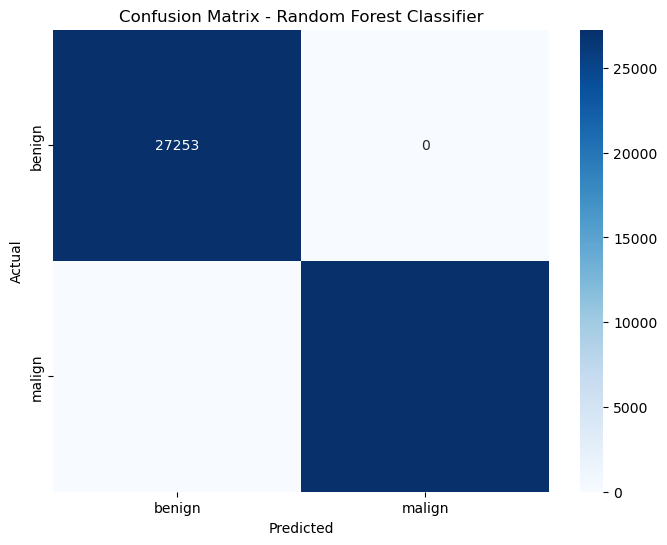

In [ ]:
# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test_encoded, y_pred_rf)
print(classification_report(y_test_encoded, y_pred_rf))

print("Confusion Matrix:\n", cm_rf)
print(sum(sum(cm_rf)))
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['benign', 'malign'], yticklabels=['benign', 'malign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

### Learning Curve Random Forest Classifier

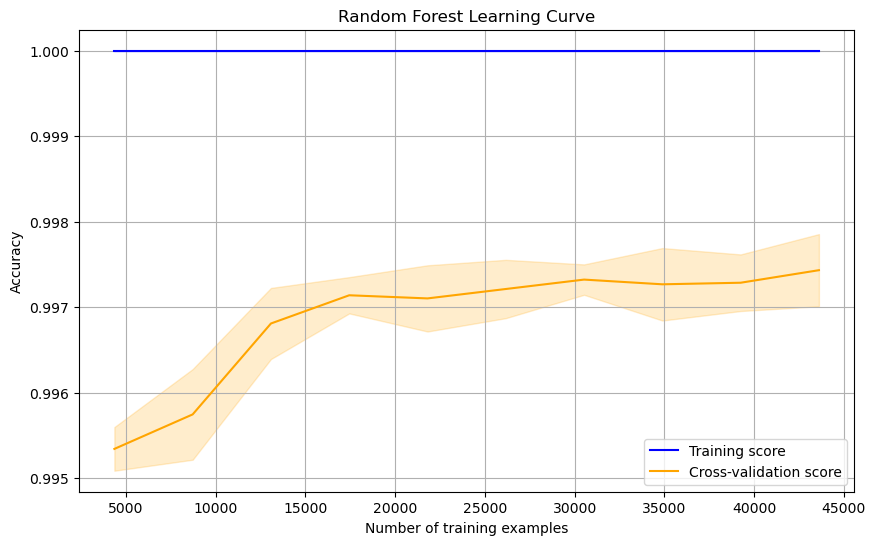

In [ ]:
train_sizesRF, train_scoresRF, test_scoresRF = learning_curve(
    rf_classifier, np.array(concat_data), y_train_encoded, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and test scores
train_meanRF = np.mean(train_scoresRF, axis=1)
train_stdRF = np.std(train_scoresRF, axis=1)
test_meanRF = np.mean(test_scoresRF, axis=1)
test_stdRF = np.std(test_scoresRF, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizesRF, train_meanRF, label='Training score', color='blue')
plt.fill_between(train_sizesRF, train_meanRF - train_stdRF, train_meanRF + train_stdRF, color='blue', alpha=0.2)
plt.plot(train_sizesRF, test_meanRF, label='Cross-validation score', color='orange')
plt.fill_between(train_sizesRF, test_meanRF - test_stdRF, test_meanRF + test_stdRF, color='orange', alpha=0.2)
plt.title('Random Forest Learning Curve')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

##  K-Nearest Neighbors classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier with k=5 (you can adjust the value of k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(np.array(concat_data), y_train_encoded)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(np.array(concat_data_pred))

# Calculate accuracy
accuracy_knn = accuracy_score(y_test_encoded, y_pred_knn)
print(f'Test accuracy: {accuracy_knn}')


Test accuracy: 0.9971929695813305


### Export model

In [ ]:
import joblib

# Save the Random Forest classifier
joblib.dump(knn_classifier, 'models/knn_107.pkl')


['models/knn_107.pkl']

In [1]:
# Calculate the confusion matrix
print(classification_report(y_test_encoded, y_pred_knn))

cm_knn = confusion_matrix(y_test_encoded, y_pred_knn)
print("Confusion Matrix:\n", cm_knn)
print(sum(sum(cm_knn)))
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['benign', 'malign'], yticklabels=['benign', 'malign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors Classifier')
plt.show()

NameError: name 'confusion_matrix' is not defined

### Learning Curve K Neighbors Classifier

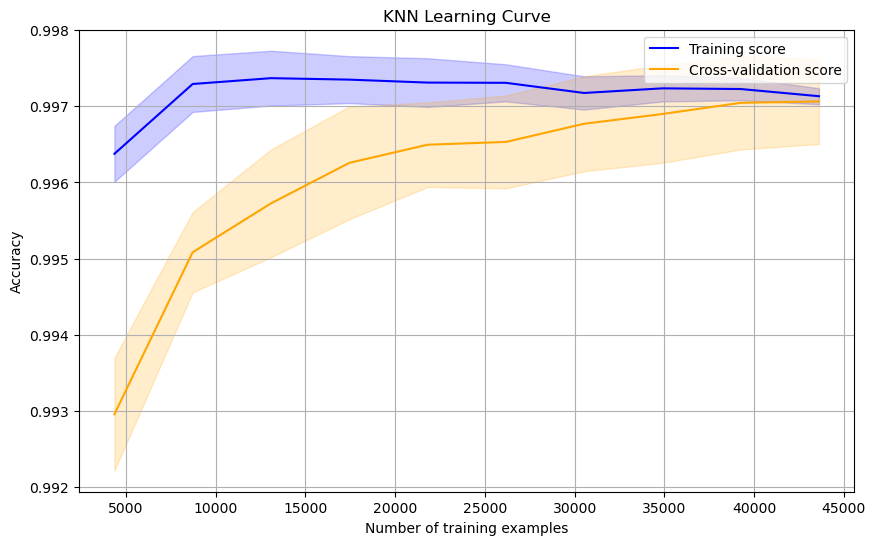

In [ ]:

# Generate learning curve data
train_sizesKNN, train_scoresKNN, test_scoresKNN = learning_curve(
    knn_classifier, np.array(concat_data), y_train_encoded, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and test scores
train_meanKNN = np.mean(train_scoresKNN, axis=1)
train_stdKNN = np.std(train_scoresKNN, axis=1)
test_meanKNN = np.mean(test_scoresKNN, axis=1)
test_stdKNN = np.std(test_scoresKNN, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizesKNN, train_meanKNN, label='Training score', color='blue')
plt.fill_between(train_sizesKNN, train_meanKNN - train_stdKNN, train_meanKNN + train_stdKNN, color='blue', alpha=0.2)
plt.plot(train_sizesKNN, test_meanKNN, label='Cross-validation score', color='orange')
plt.fill_between(train_sizesKNN, test_meanKNN - test_stdKNN, test_meanKNN + test_stdKNN, color='orange', alpha=0.2)
plt.title('KNN Learning Curve')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()